## The Spark Foundation

### Task 1 - Predict the percentage of an student based on the no. of study hours .

#### By Preeti Rani

In [1]:
#importing all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#importing and reading the data 
data_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(data_url)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'SCORES')

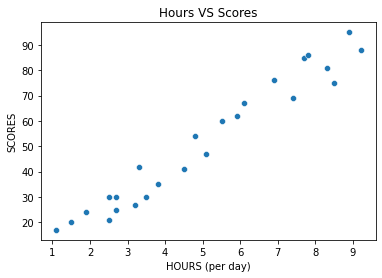

In [5]:
#exploring the dataset
sns.scatterplot(data = df , x = 'Hours' , y = 'Scores')
plt.title('Hours VS Scores')
plt.xlabel('HOURS (per day)')
plt.ylabel('SCORES')

In [6]:
#making temporary dataframes  
X = df.drop('Scores' , axis = 1)
y = df['Scores']  

In [7]:
#importing required library to split the data in training and testing data .
from sklearn.model_selection import train_test_split

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 101)

In [9]:
#importing required library to train the model 
from sklearn.linear_model import LinearRegression

In [10]:
#making the model and feeding data to it 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
#predicting the scores
predicted_scores = model.predict(X_test)

In [12]:
#printing the regression line
print('The regression line is -')
print(f'y = {model.coef_}x + {model.intercept_} ')

The regression line is -
y = [9.96651548]x + 2.1024930747922284 


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

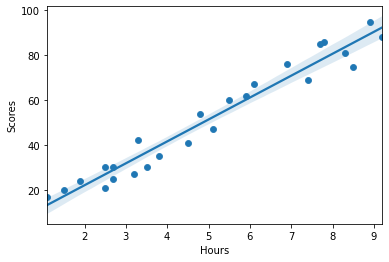

In [13]:
sns.scatterplot(data = df , x = 'Hours' , y = 'Scores')
sns.regplot(data = df , x = 'Hours' , y = 'Scores')

In [14]:
df1 = pd.DataFrame( {'Actual_Scores' : y_test , 'Predicted_Scores' : predicted_scores})

In [16]:
df1

,Actual_Scores,Predicted_Scores
16,30,27.018782
10,85,78.844662
22,35,39.975252
19,69,75.854708
7,60,56.918328
21,54,49.941767
2,27,33.995343
3,75,86.817875


In [17]:
hours = 9.25
predicted_score = model.predict([[hours]])

In [18]:
predicted_score

array([94.29276126])

In [19]:
model.coef_

array([9.96651548])

In [20]:
model.intercept_

2.1024930747922284

### Now, let's make model using the whole dataset and save it for further use and analysis

In [33]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

### Now let's save this model

In [32]:
#importing the required library for the saving and loading the model
from joblib import dump,load

In [36]:
#saving the model
dump(final_model , 'Task_1_Model.joblib')

['Task_1_Model.joblib']

In [37]:
#loading the model again for the use
loaded_model = load('Task_1_Model.joblib')

In [38]:
#using the loaded model
loaded_model.predict([[9.25]])

array([92.90985477])